# K-Means Clustering
K-Means Clustering is a type of simple unsupervised machine learning algorithm that groups, using the inputted k value (user-selected), data into clusters. For more specifics and a more broken down lesson on K-means and other examples, please visit this website: https://scikit-learn.org/stable/modules/clustering.html#k-means



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Starting with a simple example

This example is from https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1 and shows the what can be done when using k-means clustering and how it can be useful from a general science perspective. In this case, we are creating a bunch of random dots and then grouping them into clusters. From here, we can then predict which cluster another point would belong to.

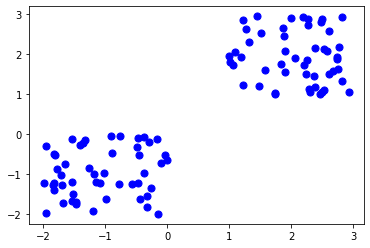

In [2]:
#Generate random data
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1

#Plot the data!
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [3]:
#Select the amount of clusters we want to create to two
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [4]:
#Print the clusters centriod
Kmean.cluster_centers_

array([[ 2.07324086,  1.92153415],
       [-1.06628293, -0.96308406]])

In [5]:
#Print which cluster data are associated with
labels = Kmean.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

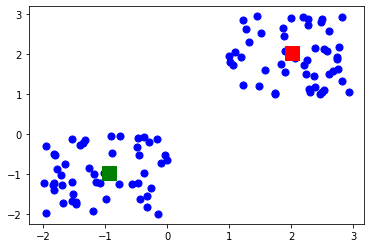

In [6]:
#Plot the data!
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

In [7]:
#Predict what cluster a certain point would belong to.
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([1], dtype=int32)

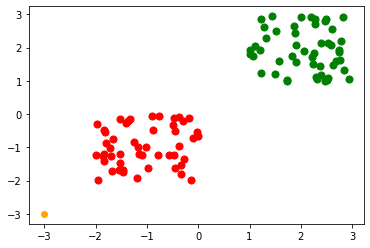

In [8]:
#We see the new point belongs in the first cluster (really the second cluster, because python is 0-based).
#Let's plot this with the new dot and clean things up a little.
plt.scatter(-3.0, -3.0, c='orange')


colors = ['g', 'r']

#Color groups based on cluster they're within
for k, col in enumerate(colors):
    cluster_data = labels == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, s=50)
    

# Now a Few, More Related Examples
Can we do this with data we have knowledge about? Of course! So let's try to group storm cell attributes into clusters to see what patterns emerge.  

In [9]:
import pandas as pd

In [10]:
#Read in a pickle file of a bunch of storm cell attributes to be used for training and prediction.
#NOTE: will have to change the path to the pickle file
pkl_data = pd.read_pickle('/home/scratch/jcorner1/Storm_Objects/mrms/mrms_storm_ids3.pkl')
pkl_data

,uniq_id,area,convex_area,eccentricity,mean_intensity,max_intensity,intensity_variance,major_axis_length,minor_axis_length,solidity,...,xmax,ymin,ymax,coords,geometry,start_year,start_month,start_day,start_hour,start_time
0,mrms20200603r0,30.0,33.0,0.964007,22.183333,25.0,2.558056,12.236631,3.253437,0.909091,...,5058,247,254,"[[247, 5050], [247, 5051], [248, 5049], [248, ...","POLYGON ((248.000 5049.000, 247.000 5050.000, ...",2020,6,3,0,2020-06-03
1,mrms20200603r1,39.0,45.0,0.891489,25.487179,34.0,21.160092,11.257467,5.100104,0.866667,...,5048,249,257,"[[249, 5041], [249, 5042], [250, 5040], [250, ...","POLYGON ((251.000 5039.000, 249.000 5041.000, ...",2020,6,3,0,2020-06-03
2,mrms20200603r2,74.0,92.0,0.804842,26.067568,35.0,26.164354,13.180803,7.822667,0.804348,...,5036,253,264,"[[253, 5023], [254, 5024], [254, 5029], [254, ...","POLYGON ((253.000 5023.000, 254.000 5030.000, ...",2020,6,3,0,2020-06-03
3,mrms20200603r3,26.0,27.0,0.902015,22.326923,24.0,1.268121,8.749284,3.777115,0.962963,...,4907,259,262,"[[259, 4900], [259, 4901], [259, 4902], [259, ...","POLYGON ((259.000 4900.000, 259.000 4903.000, ...",2020,6,3,0,2020-06-03
4,mrms20200603r4,182.0,288.0,0.831924,22.423077,27.5,4.788039,25.107762,13.932054,0.631944,...,4895,279,293,"[[279, 4875], [279, 4876], [280, 4875], [280, ...","POLYGON ((287.000 4870.000, 279.000 4875.000, ...",2020,6,3,0,2020-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,mrms20200811r16068,175.0,218.0,0.984916,28.271429,42.5,26.750612,38.722480,6.700163,0.802752,...,4933,2801,2807,"[[2801, 4911], [2801, 4912], [2801, 4913], [28...","POLYGON ((2805.000 4898.000, 2803.000 4899.000...",2020,8,11,0,2020-08-11
16069,mrms20200811r16069,28.0,31.0,0.873680,24.892857,26.5,1.131378,8.619369,4.193331,0.903226,...,858,3146,3150,"[[3146, 855], [3146, 856], [3147, 853], [3147,...","POLYGON ((3149.000 850.000, 3148.000 851.000, ...",2020,8,11,0,2020-08-11
16070,mrms20200811r16070,53.0,89.0,0.981619,24.924528,31.0,9.107512,22.368716,4.269086,0.595506,...,797,3432,3436,"[[3432, 780], [3432, 781], [3432, 782], [3432,...","POLYGON ((3434.000 775.000, 3432.000 780.000, ...",2020,8,11,0,2020-08-11
16071,mrms20200811r16071,54.0,88.0,0.985333,22.259259,25.5,2.164266,22.920510,3.911226,0.613636,...,810,3491,3496,"[[3491, 800], [3492, 796], [3492, 797], [3492,...","POLYGON ((3494.000 789.000, 3493.000 792.000, ...",2020,8,11,0,2020-08-11


In [11]:
#subset a whole day as the training data
training_ds = pkl_data[(pkl_data['start_time']==f'2020-06-03')]
training_ds

#subset the data we want to use as input variables. 
useless = training_ds[['eccentricity', 'solidity']].values


In [12]:
#Let's add some more clusters to seperate our data into
Kmean = KMeans(n_clusters=5)
Kmean.fit(useless)

KMeans(n_clusters=5)

In [13]:
#find the center of each cluster
labels = Kmean.labels_
cent = Kmean.cluster_centers_
cent

array([[0.92260686, 0.5881846 ],
       [0.73734332, 0.83463333],
       [0.89811002, 0.77991419],
       [0.7564073 , 0.64021909],
       [0.50032519, 0.71342084]])

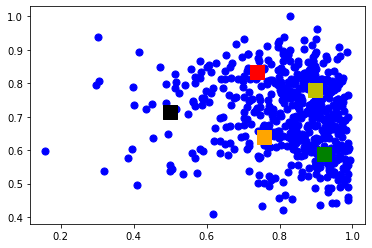

In [14]:
#plot the data
plt.scatter(useless[ : , 0], useless[ : , 1], s =50, c='b')
plt.scatter(cent[0,0], cent[0,1], s=200, c='g', marker='s')
plt.scatter(cent[1,0], cent[1,1], s=200, c='r', marker='s')
plt.scatter(cent[2,0], cent[2,1], s=200, c='y', marker='s')
plt.scatter(cent[3,0], cent[3,1], s=200, c='orange', marker='s')
plt.scatter(cent[4,0], cent[4,1], s=200, c='k', marker='s')

# Okay, But That's Pretty Useless
So let's actually try to make it do something a little more useful. Luckily, K-Means allows for more data to be added. Let's add more and see what happens.

In [15]:
#Add a few more bits of information
less_useless = training_ds[['eccentricity', 'solidity', 'area', 'intensity_variance', 'minor_axis_length', 'major_axis_length']].values

In [16]:
#Cluster our new data
Kmean = KMeans(n_clusters=5)
Kmean.fit(less_useless)

KMeans(n_clusters=5)

In [17]:
#find the center of each cluster
cent = Kmean.cluster_centers_
cent

array([[8.21822284e-01, 7.13828938e-01, 1.28536122e+02, 1.87339634e+01,
        9.12789831e+00, 1.94218993e+01],
       [8.72882954e-01, 5.28167540e-01, 1.91610000e+04, 4.73682833e+01,
        1.39442959e+02, 2.95001229e+02],
       [3.19973635e-01, 5.37921083e-01, 3.13140000e+04, 6.81301791e+01,
        2.44276159e+02, 2.57831265e+02],
       [8.11041068e-01, 5.52521573e-01, 9.43550000e+03, 3.01057506e+01,
        1.03631773e+02, 1.87736937e+02],
       [8.68986166e-01, 5.78411805e-01, 1.91359091e+03, 3.90743433e+01,
        3.98836511e+01, 9.27896624e+01]])

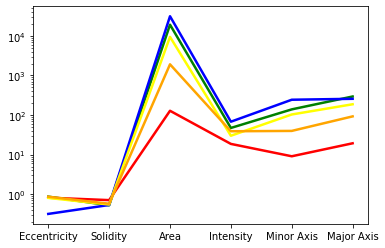

In [18]:
#list all the variables used to cluster the data
attrs = ['Eccentricity', 'Solidity', 'Area', 'Intensity', 'Minor Axis', 'Major Axis']

#Plot the data!
plt.plot(attrs, cent[0], color = 'red', lw=2.5)
plt.plot(attrs, cent[1], color = 'green', lw=2.5)
plt.plot(attrs, cent[2], color = 'blue', lw=2.5)
plt.plot(attrs, cent[3], color = 'yellow', lw=2.5)
plt.plot(attrs, cent[4], color = 'orange', lw=2.5)


#convert the y-axis to a logarithmic scale
plt.yscale("log")

In [19]:
#let's predict which cluster a random date outside the training data is assigned too.
random_point = pkl_data[(pkl_data['uniq_id']=='mrms20200811r16069')]
random_point_data = random_point[['eccentricity', 'solidity', 'area', 'intensity_variance', 'minor_axis_length', 'major_axis_length']].values

Kmean.predict(random_point_data)

array([0], dtype=int32)

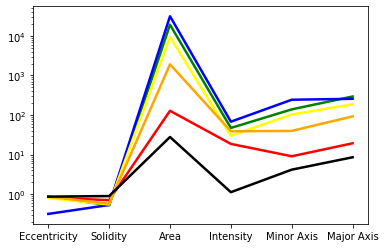

In [20]:
#list all the variables used to cluster the data
attrs = ['Eccentricity', 'Solidity', 'Area', 'Intensity', 'Minor Axis', 'Major Axis']

#Plot the data!
plt.plot(attrs, cent[0], color = 'red', lw=2.5)
plt.plot(attrs, cent[1], color = 'green', lw=2.5)
plt.plot(attrs, cent[2], color = 'blue', lw=2.5)
plt.plot(attrs, cent[3], color = 'yellow', lw=2.5)
plt.plot(attrs, cent[4], color = 'orange', lw=2.5)

#Plot the new point
plt.plot(attrs, random_point_data[0], color = 'black', lw=2.5)

#convert the y-axis to a logarithmic scale
plt.yscale("log")